<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/MNIST_CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip3 install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))
                                ])
training_dataset = datasets.MNIST(root = '/data', train=True, download=True, transform = transform ) 
validation_dataset = datasets.MNIST(root = '/data', train=False, download=True, transform = transform ) 

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size = 100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image* np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

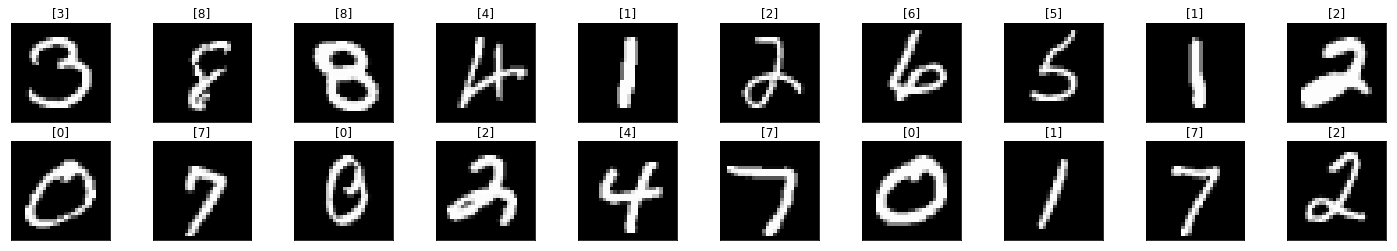

In [15]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
#images = images.to(device)
#labels = labels.to(device)
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,  xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  
  

In [0]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 20, 5, 1)
      self.conv2 = nn.Conv2d(20, 50, 5, 1)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x


In [26]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

In [28]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_loss_correct = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_correct = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    #inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs , val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
       # val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        _, val_preds = torch.max(val_outputs, 1)    
        val_running_loss += val_loss.item()
        val_running_correct += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_correct.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)           
    val_running_loss_correct.append(val_epoch_acc)                                      
    print('epoch : ', (e+1))
    print('training loss: {:.4f}, acc{:.4f}'.format(epoch_loss, epoch_acc.item()) )
    print('Validation loss: {:.4f}, Validation acc{:.4f}'.format(val_epoch_loss, val_epoch_acc.item()) )

print('Training Done!')

epoch :  1
training loss: 0.5858, acc83.7100
Validation loss: 0.1733, Validation acc95.0100
epoch :  2
training loss: 0.1444, acc95.7900
Validation loss: 0.1015, Validation acc97.0900
epoch :  3
training loss: 0.0961, acc97.1733
Validation loss: 0.0743, Validation acc97.8500
epoch :  4
training loss: 0.0754, acc97.7933
Validation loss: 0.0574, Validation acc98.1900
epoch :  5
training loss: 0.0624, acc98.0800
Validation loss: 0.0522, Validation acc98.3700
epoch :  6
training loss: 0.0538, acc98.3767
Validation loss: 0.0423, Validation acc98.6500
epoch :  7
training loss: 0.0469, acc98.5833
Validation loss: 0.0372, Validation acc98.8500
epoch :  8
training loss: 0.0415, acc98.7483
Validation loss: 0.0389, Validation acc98.7800
epoch :  9
training loss: 0.0381, acc98.8233
Validation loss: 0.0357, Validation acc98.8700
epoch :  10
training loss: 0.0352, acc98.9183
Validation loss: 0.0338, Validation acc98.9500
epoch :  11
training loss: 0.0316, acc99.0233
Validation loss: 0.0332, Validati

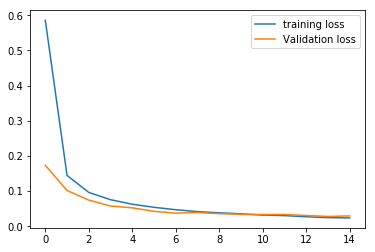

In [29]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label = 'Validation loss')
plt.legend()

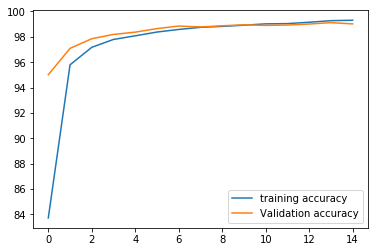

In [30]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_loss_correct, label = 'Validation accuracy')
plt.legend()

Validation accuracy becoming lower so the solution is regularization